In [26]:
import json
import numpy as np
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.plotting_tools as plot
import utils.qonversion_tools as qonvert
import utils.linalg_tools as la
from utils.molecule_tools import get_molecule
from utils.cs_vqe_tools import greedy_dfs
from matplotlib import pyplot as plt
from qat.interop.qiskit import qiskit_to_qlm
from qiskit.aqua.components.optimizers import IMFIL, NELDER_MEAD

In [15]:
with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
    
model_data.keys()

dict_keys(['H2_3-21G_SINGLET', 'H6_STO-3G_SINGLET', 'H2_6-31G_SINGLET', 'H2_6-311G_SINGLET', 'H3+_STO-3G_SINGLET', 'H3+_3-21G_SINGLET', 'H3+_STO-3G_SINGLET_alt', 'HeH+_3-21G_SINGLET', 'HeH+_3-21G_SINGLET_alt', 'HeH+_6-311G_SINGLET', 'H2O_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET_alt', 'BeH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'N+_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'CH2_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'NH_STO-3G_SINGLET', 'F+_STO-3G_SINGLET', 'Li+_STO-3G_SINGLET', 'BH_STO-3G_SINGLET', 'NeH+_STO-3G_SINGLET', 'NH2+_STO-3G_SINGLET', 'BH2+_STO-3G_SINGLET'])

In [41]:
speciesname = "H2O_STO-3G_SINGLET"
molecule    = model_data[speciesname]

ham         = molecule['ham']
uccsd       = molecule['uccsd']
hf_config   = molecule['hf_config']
num_qubits  = molecule['num_qubits']
terms_noncon= molecule['terms_noncon']
num_tapered = molecule['num_tapered']
print(num_tapered+num_qubits, num_qubits)

20 10


H2O_STO-3G_SINGLET reaches chemical accuracy for 7-qubit CS-VQE


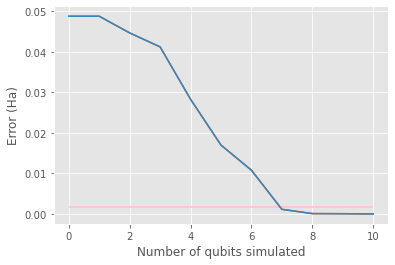

In [42]:
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)

num_sim_q = mol_circ.chem_acc_num_q
print('%s reaches chemical accuracy for %i-qubit CS-VQE' % (speciesname, num_sim_q))
mol_circ.plot_cs_vqe_errors()

In [43]:
anz_ops = mol_circ.sufficient_anz_terms(uccsd)

Testing operator 1/900
Testing operator 2/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 3/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 4/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 5/900
Testing operator 6/900
Testing operator 7/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 8/900
Testing operator 9/900
Testing operator 10/900
Testing operator 11/900
Testing operator 12/900
Testing operator 13/900
Testing operator 14/900
Testing operator 15/900
Testing operator 16/900
Testing operator 17/900
Testing operator 18/900
Testing operator 19/900
Testing operator 20/900
Testing operator 21/900
Testing operator 22/900
Testing operator 23/900
Testing operator 24/900
Testing operator 25/900
Testing operator 26/900
Testing operator 27/900
Testing operator 28/900
Testing operator 29/900
Testing opera

Testing operator 254/900
Testing operator 255/900
Testing operator 256/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 257/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 258/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 259/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 260/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 261/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 262/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 263/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 264/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 265/900
Testing operator 266/900


Testing operator 387/900
Testing operator 388/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 389/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 390/900
Testing operator 391/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 392/900
Testing operator 393/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 394/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 395/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 396/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 397/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 398/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 399/900


Testing operator 572/900
Testing operator 573/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 574/900
Testing operator 575/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 576/900
Testing operator 577/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 578/900
Testing operator 579/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 580/900
Testing operator 581/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


KeyboardInterrupt: 

In [44]:
#anz_ops = ['XIZXX', 'IYZXX'] #for B+ 
#anz_ops = ['YXIIXXII', 'IXIIZZZY', 'XYIIZZXX', 'YYIIXYII'] #for HF

anz=uccsd
#anz = {op:uccsd[op] for op in anz_ops}
anz_red = mol_circ.project_anz_terms_alt(anz_terms=anz, num_sim_q = num_sim_q)
ham_red = mol_circ.ham_reduced[num_sim_q]
qc = mol_circ.build_circuit(anz, num_sim_q)
init_params = mol_circ.init_param
print(ham_red)
print('Number of circuit parameters:', qc.num_parameters, '\n')


{'IIIIIII': -71.46441268494948, 'IZIIIII': -0.06828389856428194, 'YIIIZZZ': 0.012979324457623993, 'ZZIIZII': 0.0682839583363996, 'YZIIZZZ': -9.352568554542389e-05, 'ZIIIZII': -0.31372270288906534, 'IZZIZZI': 0.09902848015930422, 'IIZIZZI': -0.11275000398784239, 'YZZIIIZ': 0.0011896162677200882, 'ZIZIIZI': 0.14165695630304678, 'YIZIIIZ': -1.5977231897372533e-23, 'ZZZIIZI': 3.4694469519168255e-18, 'IZIZZIZ': 0.09902848015930464, 'IIIZZIZ': -0.1416569508232148, 'YZIZIZI': 0.0032340874410006996, 'ZIIZIIZ': 0.11275001888241021, 'YIIZIZI': -1.5977231897372533e-23, 'ZZIZIIZ': 3.4694469519168255e-18, 'IIZZIZZ': 0.14926548536877474, 'IIZIIII': 0.47295651628467583, 'IZZIIII': -0.13521837630462488, 'YIZIZZZ': 0.005077963601708283, 'ZZZIZII': 0.1523927645546269, 'IZIIZZI': 0.12035268674229259, 'YZIIIIZ': 0.004347735950117469, 'ZIIIIZI': -0.16151685455007497, 'IZZZZIZ': 0.13721425345352747, 'YIIZZII': 1.5977231897372533e-23, 'ZZIZZZZ': -3.4694469519168255e-18, 'IIIZIII': 0.4729565162846736, 'IZIZII

# Performing the simulation *without* noise

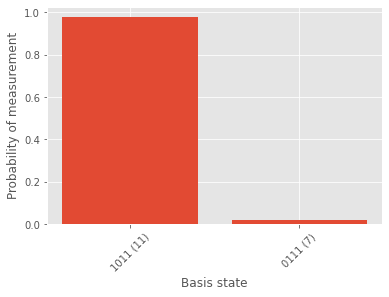

*   Performing 4-qubit CS-VQE over qubit positions 3, 2, 1, 0 ...


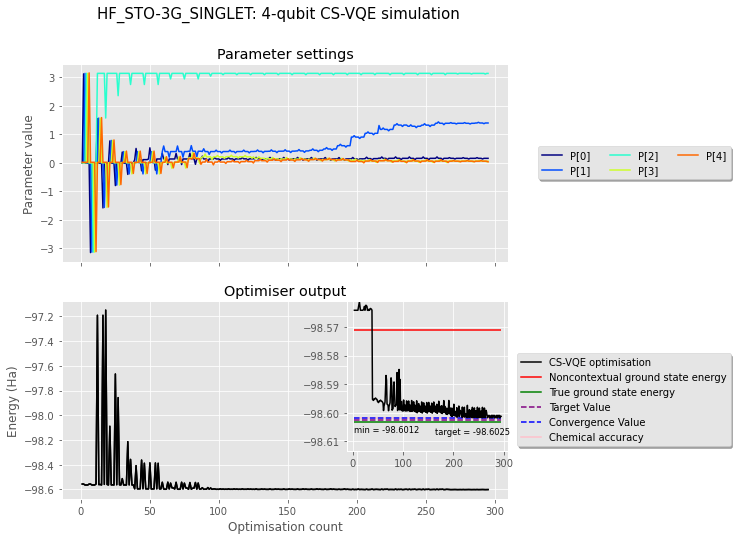

In [29]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=anz, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=IMFIL(maxiter=10000), 
                                 param_bound=np.pi,
                                 noise=False,
                                show_amps=True)

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)

In [35]:
list(zip(*list(cs_vqe_results['params'].values())))[0]

(-0.017038195424997404,
 -2.9679991797593175e-10,
 0.0012872110742754295,
 0.0,
 0.017038195424997404)

In [45]:
qc_qlm = qiskit_to_qlm(qc)

In [48]:
instructions=[]
param_num=0
for gate, var, q_pos in list(qc_qlm.iterate_simple()):
    if var!=[]:
        var=[param_num%num_sim_q]
        param_num += 1
    instructions.append((gate, var, q_pos))

In [49]:
qc_qlm_dict = {'hamiltonian':ham_red,
                'num_qubits':qc_qlm.nbqbits,
               'num_params':qc.num_parameters,
               'instructions':instructions}

In [50]:
qc_qlm_dict

{'hamiltonian': {'IIIIIII': -71.46441268494948,
  'IZIIIII': -0.06828389856428194,
  'YIIIZZZ': 0.012979324457623993,
  'ZZIIZII': 0.0682839583363996,
  'YZIIZZZ': -9.352568554542389e-05,
  'ZIIIZII': -0.31372270288906534,
  'IZZIZZI': 0.09902848015930422,
  'IIZIZZI': -0.11275000398784239,
  'YZZIIIZ': 0.0011896162677200882,
  'ZIZIIZI': 0.14165695630304678,
  'YIZIIIZ': -1.5977231897372533e-23,
  'ZZZIIZI': 3.4694469519168255e-18,
  'IZIZZIZ': 0.09902848015930464,
  'IIIZZIZ': -0.1416569508232148,
  'YZIZIZI': 0.0032340874410006996,
  'ZIIZIIZ': 0.11275001888241021,
  'YIIZIZI': -1.5977231897372533e-23,
  'ZZIZIIZ': 3.4694469519168255e-18,
  'IIZZIZZ': 0.14926548536877474,
  'IIZIIII': 0.47295651628467583,
  'IZZIIII': -0.13521837630462488,
  'YIZIZZZ': 0.005077963601708283,
  'ZZZIZII': 0.1523927645546269,
  'IZIIZZI': 0.12035268674229259,
  'YZIIIIZ': 0.004347735950117469,
  'ZIIIIZI': -0.16151685455007497,
  'IZZZZIZ': 0.13721425345352747,
  'YIIZZII': 1.5977231897372533e-23,
  'Z

In [52]:
import json 
 
with open("data/QLM_circuits/H2O_UCCSD.json", "w") as outfile: 
    json.dump(qc_qlm_dict, outfile)